In [1]:
#!pip install fastai2

In [2]:
#!pip install fastai --upgrade

In [3]:
# CLICK ME
#%pip install scipy --upgrade
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
 path, get_image_files(path), valid_pct=0.2, seed=42,
 label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/Users/devanshusaindane/miniforge3/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/devanshusaindane/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 19.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.169139,0.016522,0.006089,01:13


epoch,train_loss,valid_loss,error_rate,time
0,0.053849,0.017412,0.004736,01:33


In [5]:
%pip install ipywidgets
import ipywidgets as widgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

In [15]:
img = PILImage.create(list(uploader.value.values())[0]['content'])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

AttributeError: 'tuple' object has no attribute 'values'

In [8]:
#CamVid Dataset

In [16]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(0)

epoch,train_loss,valid_loss,time
0,2.801676,2.493295,00:07


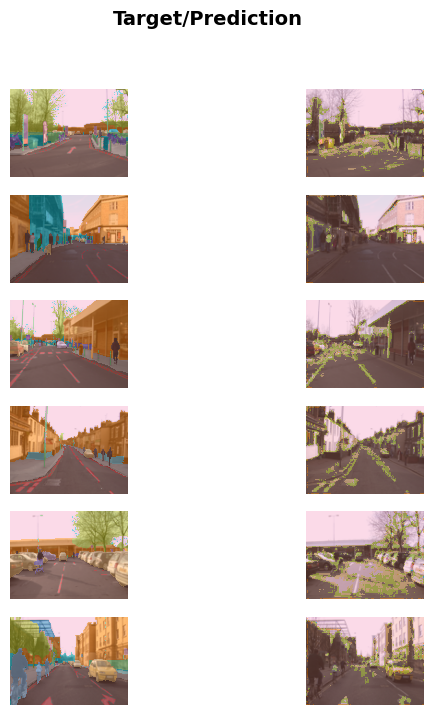

In [17]:
learn.show_results(max_n=6, figsize=(7,8))

In [18]:
#NLP imdb dataset

In [2]:
"""from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)"""

"from fastai.text.all import *\n\ndls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')\nlearn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)\nlearn.fine_tune(4, 1e-2)"

In [1]:
#learn.predict("I really liked that movie!")

In [20]:
#Salary dataset

In [21]:
from fastai.tabular.all import *
path =untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                                  'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

/Users/devanshusaindane/miniforge3/lib/python3.12/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [22]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.378760,0.372934,0.821867,00:07
1,0.361691,0.354941,0.832617,00:05
2,0.349100,0.351490,0.831849,00:05


In [23]:
#Recommendation system

In [24]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.537914,1.388709,00:01


epoch,train_loss,valid_loss,time
0,1.367138,1.339482,00:00
1,1.279149,1.189587,00:00
2,1.067955,0.890869,00:00
3,0.843711,0.720634,00:00
4,0.708891,0.674131,00:00
5,0.663184,0.654625,00:00
6,0.626620,0.646509,00:00
7,0.632713,0.642289,00:00
8,0.601395,0.641085,00:00
9,0.599649,0.640803,00:00


In [25]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,38.0,22.0,4.0,4.011071
1,89.0,72.0,4.0,3.200385
2,4.0,26.0,3.5,3.782215
3,21.0,55.0,3.5,3.909547
4,62.0,45.0,4.0,3.978752
5,47.0,93.0,4.5,4.345174
6,70.0,89.0,5.0,4.023459
7,41.0,1.0,3.0,4.193516
8,59.0,62.0,4.0,4.382164


In [26]:
#Bear Classification

In [27]:
class DataLoaders(GetAttr):
 def __init__(self, *loaders): self.loaders = loaders
 def __getitem__(self, i): return self.loaders[i]
 train,valid = add_props(lambda i,self: self[i])

In [28]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [29]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

python(7642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.6 MB/s eta 0:00:00
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached overrides-7.7.0-py3-none-any.whl (17 kB)
Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)


python(7669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec migrate
nbconvert run server troubleshoot trust

Jupyter command `jupyter-serverextension` not found.


In [30]:
#MNIST

In [31]:
path = untar_data(URLs.MNIST_SAMPLE)

In [32]:
path.ls()

(#3) [Path('/Users/devanshusaindane/.fastai/data/mnist_sample/valid'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/labels.csv'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train')]

In [33]:
(path/'train').ls()

(#2) [Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/7'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3')]

In [34]:
threes= (path/'train'/'3').ls().sorted()
sevens= (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10091.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10093.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10097.png'),Path('/Users/devanshusaindane/.fastai/data/mnist_sample/train/3/10099.png'),Path('/

In [35]:
import PIL

In [36]:
im3_path = threes[1]
im3 = PIL.Image.open(im3_path)
im3

In [37]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [38]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [39]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

In [40]:
len(three_tensors),len(seven_tensors)

(6131, 6265)

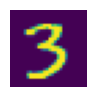

In [41]:
show_image(three_tensors[1]);

In [42]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [43]:
len(stacked_threes.shape)

3

In [44]:
stacked_threes.ndim

3

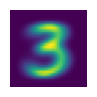

In [45]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

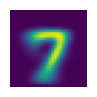

In [46]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

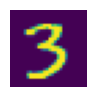

In [47]:
a_3 = stacked_threes[1]
show_image(a_3);

In [48]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean
dist_3_abs,dist_3_sqr() 

(tensor(0.1114), tensor(0.0408))

In [49]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [50]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()


(tensor(0.1586), tensor(0.3021))

In [51]:
#Pytorch Tensors

In [52]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [53]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [55]:
tns[1]

tensor([4, 5, 6])

In [56]:
tns[:,1]

tensor([2, 5])

In [57]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [58]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [59]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [60]:
def is_3(x): return mnist_distance(x, mean3)< mnist_distance(x, mean7)

In [61]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [62]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [63]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1- is_3(valid_7_tens).float()).mean()

In [64]:
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [65]:
#Stochastic Gradient Descent

In [66]:
def pr_eight(x, w):
	return (x * w).sum()

In [67]:
xt = tensor(3.).requires_grad_()

In [68]:
w = tensor(1.).requires_grad_()
yt = pr_eight(xt, w)
yt

tensor(3., grad_fn=<SumBackward0>)

In [69]:
yt.backward()

In [70]:
xt.grad

tensor(1.)

In [71]:
def f(x):
    return (x**2).sum()

In [72]:
yt = f(xt)
yt

tensor(9., grad_fn=<SumBackward0>)

In [73]:
yt.backward()
xt.grad

tensor(7.)

In [74]:
#STepping with a learning rate

In [75]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

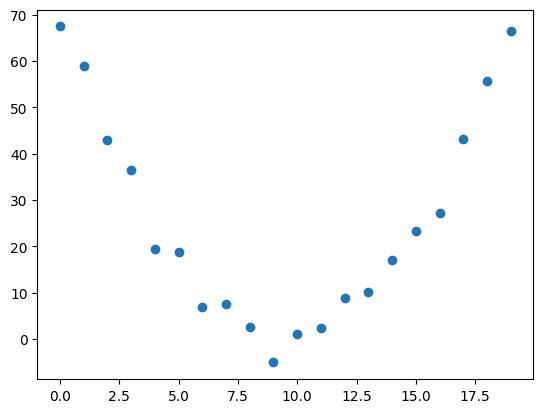

In [76]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [77]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [78]:
def mse(preds, targets):
    return ((preds-targets)**2).mean()

In [79]:
params = torch.randn(3).requires_grad_()

In [80]:
preds = f(time,params)

In [81]:
import matplotlib.pyplot as plt

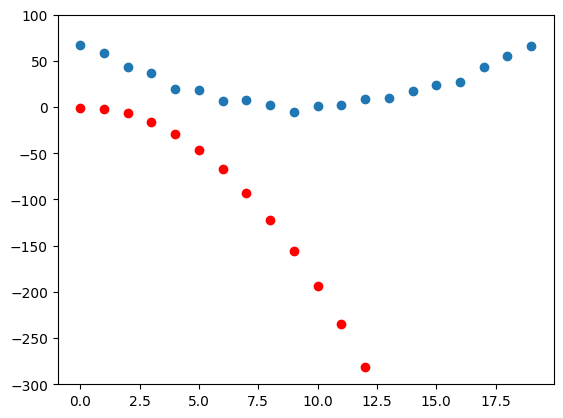

In [82]:
def show_preds(preds, ax=None):
 if ax is None: ax=plt.subplots()[1]
 ax.scatter(time, speed)
 ax.scatter(time, to_np(preds), color='red')
 ax.set_ylim(-300,100)
show_preds(preds)

In [83]:
loss = mse(preds, speed)

In [84]:
loss

tensor(125033.1094, grad_fn=<MeanBackward0>)

In [85]:
loss.backward()
params.grad

tensor([-118294.0781,   -7572.5693,    -534.7604])

In [86]:
params.grad * 1e-5

tensor([-1.1829, -0.0757, -0.0053])

In [87]:
params

tensor([-2.0354,  1.0952, -0.8079], requires_grad=True)

In [88]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [89]:
preds = f(time,params)
mse(preds, speed)

tensor(24215.8906, grad_fn=<MeanBackward0>)

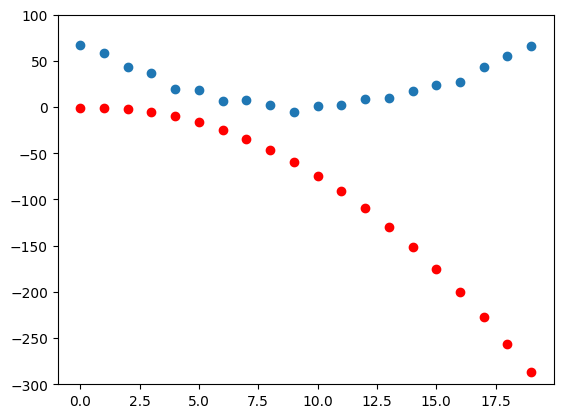

In [90]:
show_preds(preds)

In [91]:
def apply_step(params, prn=True):
    preds = f(time,params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [92]:
for i in range(10): 
    apply_step(params)

24215.890625
5138.1826171875
1528.09326171875
844.9495849609375
715.6729736328125
691.2051391601562
686.5702514648438
685.6884765625
685.5167846679688
685.4795532226562


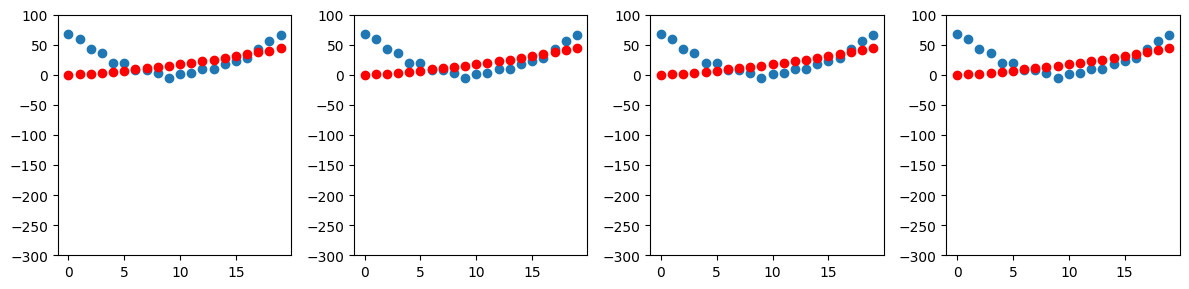

In [93]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [94]:
#MNIST Loss Function

In [95]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [96]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [97]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [98]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [99]:
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

In [100]:
bias=init_params(1)

In [101]:
(train_x[0]*weights.T).sum() + bias

tensor([5.7062], grad_fn=<AddBackward0>)

In [102]:
def linear1(xb):
    return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 5.7062],
        [-1.7980],
        [ 6.3826],
        ...,
        [-7.4652],
        [12.5340],
        [-1.6013]], grad_fn=<AddBackward0>)

In [103]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [False],
        [ True],
        ...,
        [ True],
        [False],
        [ True]])

In [104]:
corrects.float().mean().item()

0.5020974278450012

In [105]:
weights = weights * 1.0001
preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.5020974278450012

In [106]:
trgts = tensor([1,0,1])
prds = tensor([0.9, 0.4, 0.2])

In [107]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [108]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [109]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [110]:
mnist_loss(tensor([0.9, 0.4, 0.8]), trgts)

tensor(0.2333)

In [111]:
#Sigmoid

In [112]:
def Sigmoid(x):
    return 1/(1+torch.exp(-x))

In [113]:
#Mini-batches

In [114]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)

In [115]:
list(dl)

[tensor([ 8, 13, 14,  5,  7]),
 tensor([ 0, 11,  9,  1,  2]),
 tensor([ 6, 12,  3,  4, 10])]

In [116]:
ds= L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [117]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([24, 14,  5,  8, 11, 23]), ('y', 'o', 'f', 'i', 'l', 'x')),
 (tensor([13, 15, 16, 25, 19, 22]), ('n', 'p', 'q', 'z', 't', 'w')),
 (tensor([ 3, 18,  4,  6, 20,  7]), ('d', 's', 'e', 'g', 'u', 'h')),
 (tensor([ 0, 12,  9, 10, 21,  2]), ('a', 'm', 'j', 'k', 'v', 'c')),
 (tensor([17,  1]), ('r', 'b'))]

In [118]:
weights = init_params((28*28,1))
bias = init_params(1)

In [119]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [120]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [121]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [122]:
preds = linear1(batch)
preds

tensor([[-3.2830],
        [-9.4755],
        [-9.5498],
        [-8.3178]], grad_fn=<AddBackward0>)

In [123]:
loss =mnist_loss(preds, train_y[:4])
loss

tensor(8.6565, grad_fn=<MeanBackward0>)

In [124]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.1511), tensor([-1.]))

In [125]:
def cal_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [126]:
cal_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.3022), tensor([-2.]))

In [127]:
cal_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.4534), tensor([-3.]))

In [128]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [129]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        cal_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [130]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [131]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [132]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [133]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [134]:
validate_epoch(linear1)

0.5451

In [135]:
lr = 1
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9557

In [136]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9548 0.9543 0.9543 0.9543 0.9543 0.9543 0.9538 0.9538 0.9538 0.9538 0.9538 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 

In [137]:
#Optimizer

In [138]:
linear_model = nn.Linear(28*28,1)

In [139]:
w,b = linear_model.parameters()

In [140]:
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [141]:
class BasicOptim:
    def __init__(self,params, lr): self.params, self.lr = list(params), lr
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [142]:
opt = BasicOptim(linear_model.parameters(), lr)

In [143]:
def train_epoch(model):
    for xb,yb in dl:
        cal_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [144]:
validate_epoch(linear_model)

0.6825

In [145]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [146]:
train_model(linear_model, 20)

0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 

In [147]:
linear_model = nn.Linear(28*28,1)
opt= SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 

In [148]:
dls = DataLoaders(dl, valid_dl)

In [149]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [150]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,-82.897522,-335.758667,0.953386,00:01
1,-309.270630,-672.075378,0.953386,00:00
2,-570.658508,-1008.392273,0.953386,00:00
3,-854.911987,-1344.708984,0.953386,00:00
4,-1152.342529,-1681.025757,0.953386,00:00
5,-1456.675659,-2017.342773,0.953386,00:00
6,-1764.379883,-2353.659668,0.953386,00:00
7,-2073.648682,-2689.976562,0.953386,00:00
8,-2383.616699,-3026.293213,0.953386,00:00
9,-2693.889160,-3362.610107,0.953386,00:00


In [151]:
#Nonlinearity

In [152]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [153]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [154]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [155]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,99484040.000000,-1397029888.000000,0.961727,00:01
1,1319065408145195008.000000,-24551709819168358400.000000,0.962218,00:00
2,21414319311659941060270882816.000000,-434756925564361980380771778560.000000,0.962218,00:00
3,nan,nan,0.961727,00:00
4,nan,nan,0.504416,00:00
5,nan,nan,0.504416,00:00
6,nan,nan,0.504416,00:00
7,nan,nan,0.504416,00:00
8,nan,nan,0.504416,00:00
9,nan,nan,0.504416,00:00


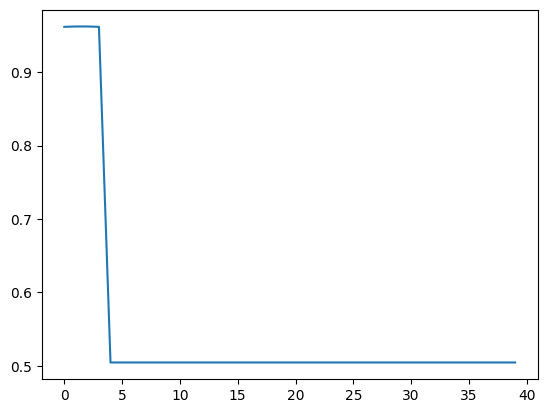

In [156]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [157]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.079890,0.015840,0.995093,00:22


In [158]:
#%pip install fastai
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [159]:
path.ls()

(#2) [Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/annotations')]

In [160]:
(path/"images").ls()

(#7393) [Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/saint_bernard_139.jpg'),Path('/Users/devanshusaindane/.fastai/data/oxford-iiit

In [161]:
import re
from pathlib import Path

fnames = (path/"images").ls()
for fname in fnames:
	print(re.findall(r'(.+)_\d+.jpg$', fname.name))

['Egyptian_Mau']
['pug']
['basset_hound']
['Siamese']
['shiba_inu']
['Siamese']
['Birman']
['leonberger']
['Siamese']
['shiba_inu']
['saint_bernard']
['Birman']
['Abyssinian']
['basset_hound']
['miniature_pinscher']
['Siamese']
['wheaten_terrier']
['Egyptian_Mau']
['pug']
['shiba_inu']
['wheaten_terrier']
['saint_bernard']
['scottish_terrier']
['scottish_terrier']
['saint_bernard']
['saint_bernard']
['pomeranian']
['Abyssinian']
['shiba_inu']
['wheaten_terrier']
['german_shorthaired']
['english_setter']
['pug']
['newfoundland']
['pomeranian']
['Siamese']
['pomeranian']
['Siamese']
['Sphynx']
['Egyptian_Mau']
['Siamese']
['newfoundland']
['pomeranian']
['Siamese']
['pug']
['english_setter']
['german_shorthaired']
['British_Shorthair']
['Birman']
['Bombay']
['Egyptian_Mau']
['British_Shorthair']
['shiba_inu']
['pomeranian']
['Birman']
['Siamese']
['pomeranian']
['german_shorthaired']
['shiba_inu']
['english_setter']
['boxer']
['great_pyrenees']
['leonberger']
['samoyed']
['Russian_Blue']

In [162]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['shiba_inu']

In [163]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(seed=42),
 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
 item_tfms=Resize(460),
 batch_tfms=aug_transforms(size=224, min_scale=0.75))


In [166]:
import os
import torch
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

#%pip install --upgrade fastai
#%pip install --upgrade torch torchvision
dls = pets.dataloaders(path/"images")

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [167]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(seed=42),
 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
 item_tfms=Resize(224))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/saint_bernard_60.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /Users/devanshusaindane/.fastai/data/oxford-iiit-pet/images/saint_bernard_60.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort':

In [168]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.289996,0.144303,0.051030,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.061571,0.017533,0.006869,00:24
1,0.016642,0.008682,0.002944,00:23


In [169]:
#Cross Entropy Loss

In [170]:
x, y = dls.one_batch()

In [171]:
preds = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([[3.1153e-06, 1.0000e+00],
        [1.6873e-05, 9.9998e-01],
        [9.8274e-01, 1.7257e-02],
        [4.1482e-03, 9.9585e-01],
        [1.0000e+00, 3.1598e-10],
        [1.0000e+00, 2.5468e-06],
        [1.8094e-06, 1.0000e+00],
        [4.1104e-06, 1.0000e+00],
        [9.9992e-01, 8.1918e-05],
        [1.0000e+00, 1.1612e-07],
        [2.4683e-06, 1.0000e+00],
        [1.3017e-05, 9.9999e-01],
        [1.6403e-03, 9.9836e-01],
        [1.0000e+00, 1.4698e-06],
        [9.9999e-01, 1.3279e-05],
        [2.5753e-10, 1.0000e+00],
        [1.0578e-05, 9.9999e-01],
        [9.9994e-01, 5.9582e-05],
        [1.4173e-05, 9.9999e-01],
        [8.7905e-04, 9.9912e-01],
        [1.1591e-05, 9.9999e-01],
        [2.7155e-03, 9.9728e-01],
        [8.7394e-08, 1.0000e+00],
        [5.0480e-13, 1.0000e+00],
        [1.0000e+00, 3.2631e-06],
        [6.0798e-03, 9.9392e-01],
        [9.9827e-01, 1.7251e-03],
        [4.1783e-06, 1.0000e+00],
        [1.0000e+00, 7.8986e-07],
        [2.482

In [172]:
len(preds[0]),preds[0].sum()

(64, tensor(64.))

In [173]:
#Softmax

In [174]:
acts = torch.randn((6,2))*2
acts

tensor([[ 1.2695,  0.3448],
        [ 0.9343, -1.6554],
        [ 1.5440, -0.2778],
        [-0.8287, -1.3030],
        [ 1.2611, -1.8618],
        [-2.5193,  1.7883]])

In [175]:
acts.sigmoid()

tensor([[0.7807, 0.5853],
        [0.7180, 0.1604],
        [0.8240, 0.4310],
        [0.3039, 0.2137],
        [0.7792, 0.1345],
        [0.0745, 0.8567]])

In [176]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.7160, 0.9302, 0.8608, 0.6164, 0.9578, 0.0133])

In [177]:
def softmax(x):
    return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [178]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.7160, 0.2840],
        [0.9302, 0.0698],
        [0.8608, 0.1392],
        [0.6164, 0.3836],
        [0.9578, 0.0422],
        [0.0133, 0.9867]])

In [179]:
def mnist_loss(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).mean()

In [180]:
targ = tensor([0,1,0,1,1,0])

In [181]:
sm_acts

tensor([[0.7160, 0.2840],
        [0.9302, 0.0698],
        [0.8608, 0.1392],
        [0.6164, 0.3836],
        [0.9578, 0.0422],
        [0.0133, 0.9867]])

In [182]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.7160, 0.0698, 0.8608, 0.3836, 0.0422, 0.0133])

In [183]:
-sm_acts[idx, targ]

tensor([-0.7160, -0.0698, -0.8608, -0.3836, -0.0422, -0.0133])

In [184]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.7160, -0.0698, -0.8608, -0.3836, -0.0422, -0.0133])

In [185]:
loss_func = nn.CrossEntropyLoss()

In [186]:
loss_func(acts, targ)

tensor(1.9319)

In [187]:
F.cross_entropy(acts, targ)

tensor(1.9319)

In [188]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.3341, 2.6621, 0.1499, 0.9581, 3.1660, 4.3209])

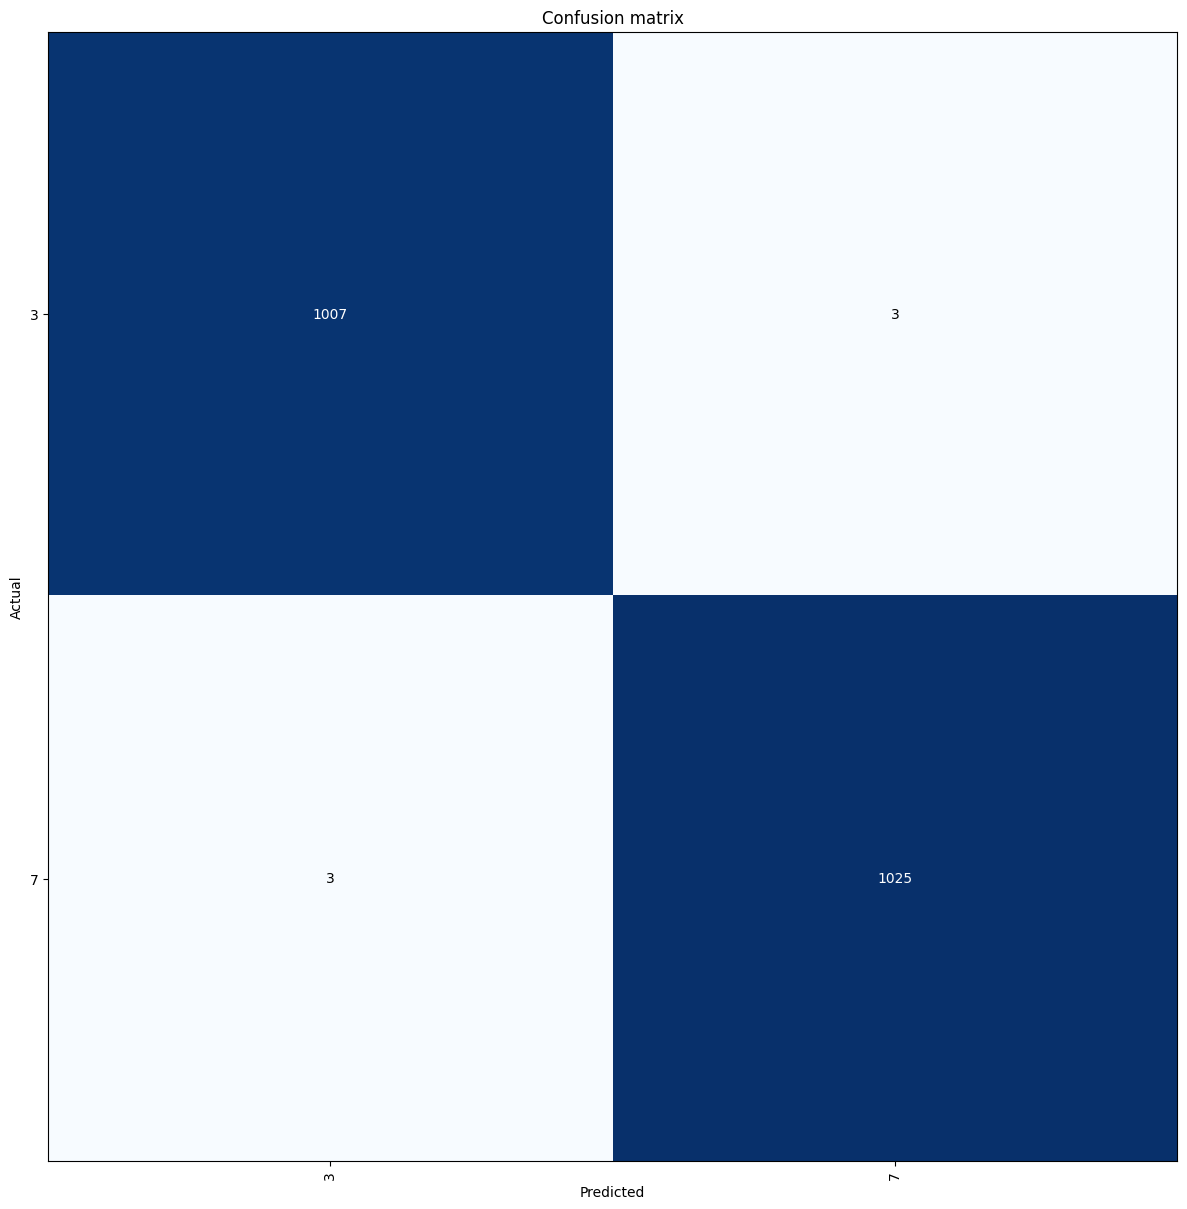

In [189]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

In [190]:
interp.most_confused(min_val=5)

[]

In [191]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,0.193542,0.190406,0.023062,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.041180,0.006189,0.000491,00:24


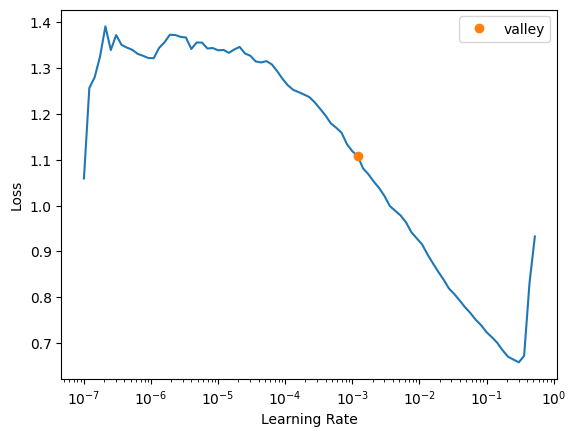

In [198]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_find_result = learn.lr_find()

In [199]:
print(f"Minimum/10: (lr_min:.2e), steepest point: (lr_steep:.2e)")

Minimum/10: (lr_min:.2e), steepest point: (lr_steep:.2e)


In [200]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.255084,0.181687,0.055447,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.042421,0.019783,0.005397,00:24
1,0.011463,0.007796,0.004907,00:23


In [201]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.106828,0.039865,0.013739,00:15
1,0.045651,0.016143,0.007360,00:15
2,0.024853,0.015570,0.005888,00:15


In [202]:
learn.unfreeze()

SuggestedLRs(valley=2.511886486900039e-05)

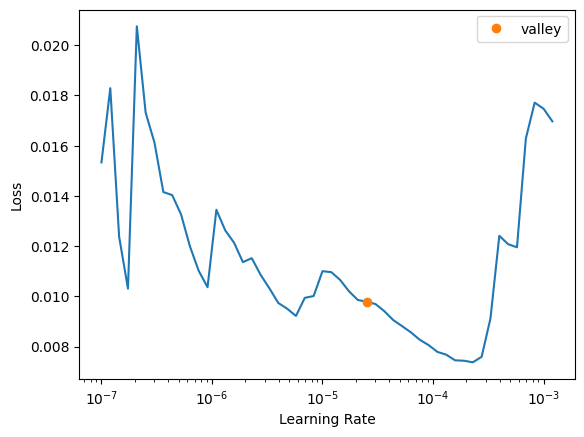

In [203]:
learn.lr_find()

In [204]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.022661,0.012161,0.003925,00:24
1,0.014162,0.008910,0.003925,00:23
2,0.007073,0.007611,0.002944,00:23
3,0.004900,0.006553,0.001963,00:23
4,0.003153,0.006695,0.002453,00:23
5,0.004347,0.005705,0.001472,00:23


In [205]:
#Discriminative Learning Rates

In [206]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.131421,0.056931,0.017664,00:15
1,0.049036,0.023612,0.007851,00:15
2,0.021664,0.013640,0.005888,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.019595,0.014575,0.004907,00:25
1,0.017556,0.013232,0.004907,00:23
2,0.013341,0.014803,0.005397,00:23
3,0.009601,0.014871,0.005397,00:23
4,0.009482,0.009987,0.002944,00:23
5,0.005875,0.011010,0.002453,00:23
6,0.002957,0.013712,0.005397,00:23
7,0.002110,0.011185,0.003925,00:23
8,0.001571,0.010386,0.002944,00:23
9,0.003336,0.015746,0.004907,00:23


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

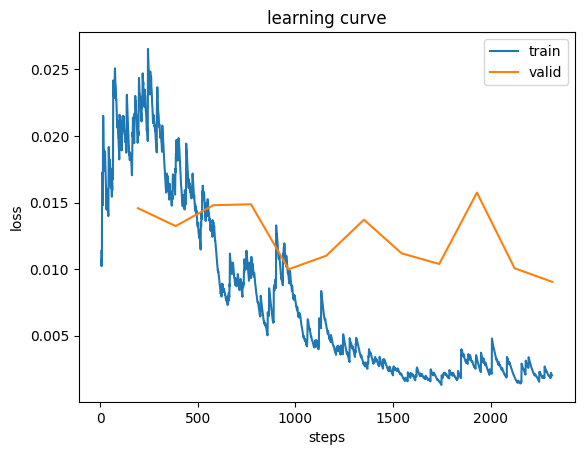

In [207]:
learn.recorder.plot_loss()

In [208]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/devanshusaindane/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 32.9MB/s]
/Users/devanshusaindane/miniforge3/lib/python3.12/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/Users/devanshusaindane/miniforge3/lib/python3.12/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/devanshusaindane/miniforge3/lib/python3.12/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype

epoch,train_loss,valid_loss,error_rate,time
0,0.500261,0.437587,0.124141,00:24
1,0.418899,0.314224,0.123651,00:21
2,0.333369,0.392360,0.102061,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.264903,0.242488,0.079980,00:32
1,0.193266,0.292152,0.054465,00:29
2,0.147749,0.175296,0.035819,00:30
3,0.112118,0.175869,0.026497,00:29
4,0.091072,0.209356,0.026497,00:29
5,0.086634,0.279998,0.028950,00:29


In [209]:
#PASCAL dataset

In [210]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [211]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [212]:
df.iloc[:,0]

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [213]:
df.iloc[0,:]

fname       000005.jpg
labels           chair
is_valid          True
Name: 0, dtype: object

In [214]:
df['fname']

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [215]:
df1=pd.DataFrame()

In [216]:
df1['a'] = [1,2,3,4]
df1


,a
0,1
1,2
2,3
3,4


In [217]:
df1['b'] = [10, 20, 30, 40]
df1['a'] + df1['b']


0    11
1    22
2    33
3    44
dtype: int64

In [218]:
dblock = DataBlock()

In [219]:
dsets= dblock.datasets(df)

In [220]:
dsets.train[0]

(fname       001492.jpg
 labels             car
 is_valid         False
 Name: 741, dtype: object,
 fname       001492.jpg
 labels             car
 is_valid         False
 Name: 741, dtype: object)

In [221]:
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('000431.jpg', 'aeroplane car')

In [222]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('/Users/devanshusaindane/.fastai/data/pascal_2007/train/008117.jpg'),
 ['bird'])

In [223]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [224]:
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#1) ['cat']

In [225]:
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

In [226]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x,
                   get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [227]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x,
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

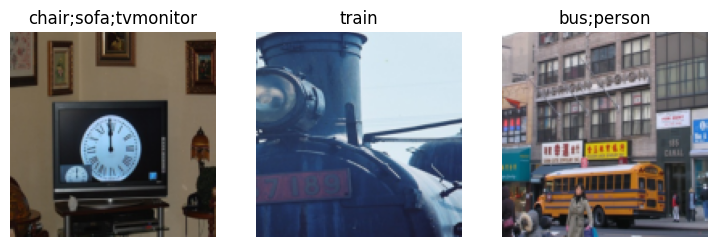

In [228]:
dls.show_batch(nrows=1, ncols=3)

In [229]:
#Binary Cross-Entropy

In [230]:
learn = vision_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/devanshusaindane/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 33.5MB/s]


In [233]:
x, y = dls.train.one_batch()
learn.model.to('mps')
activs = learn.model(x)
activs.shape

torch.Size([64, 20])

In [234]:
activs[0]

TensorImage([ 0.5272, -0.1974,  0.2288, -2.2971,  0.1321, -1.7983, -0.7952,
             -0.2064,  1.2862,  1.8057,  1.3566, -1.5166,  2.2208, -0.5903,
             -1.1372, -1.3783, -3.3593, -0.7654,  0.6803,  0.2818],
            device='mps:0', grad_fn=<AliasBackward0>)

In [236]:
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    def binary_cross_entropy(inputs, targets):
        inputs = inputs.sigmoid()
        return -torch.where(targets==1, inputs, 1-inputs).log().mean()

In [241]:
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs.as_subclass(torch.Tensor).float(), y.as_subclass(torch.Tensor).float())
loss

tensor(1.0916, device='mps:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [242]:
def accuracy(inp, targ, axis=-1):
    "Compute accuracy with 'targ' when 'pred' is bs * n_classes"
    pred = inp.argmax(dim=axis)
    return (pred == targ).float().mean()

In [243]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when 'inp' and 'targ' are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh) == targ.bool()).float().mean()

In [244]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.952147,0.695775,0.234382,01:18
1,0.825706,0.542575,0.285876,01:07
2,0.602493,0.191331,0.835618,01:06
3,0.355982,0.115588,0.946434,01:12


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.126256,0.101706,0.950339,01:57
1,0.113819,0.095813,0.952928,01:51
2,0.097172,0.094256,0.958187,01:55


In [245]:
learn.metrics = partial(accuracy_multi, thresh=0.1)
learn.validate()

(#2) [0.09425611793994904,0.9391036629676819]

In [246]:
learn.metrics = partial(accuracy_multi, thresh=0.99)
learn.validate()

(#2) [0.09425611793994904,0.943466067314148]

In [247]:
preds, targs = learn.get_preds()

In [248]:
accuracy_multi(preds, targs, thresh=0.9, sigmoid=False)

tensor(0.9585)

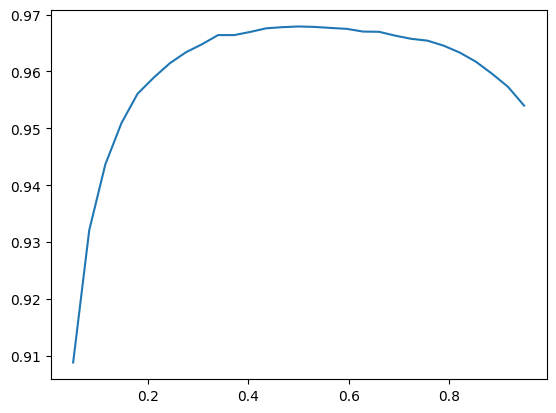

In [249]:
xs = torch.linspace(0.05, 0.95, 29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs, accs)

In [250]:
#Regression

In [251]:
path = untar_data(URLs.BIWI_HEAD_POSE)
path.ls()

(#50) [Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/io_sample.cpp'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/07.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/13.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/03'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/04'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/12.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/06.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/10.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/04.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/05'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/02'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/05.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/11.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/15.obj'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01.obj

In [252]:
(path/'01').ls()

(#1000) [Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00393_rgb.jpg'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00383_rgb.jpg'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00100_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00366_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00367_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00101_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00454_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00455_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00008_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00134_rgb.jpg'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_00009_pose.txt'),Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/01/frame_001

In [255]:
img_files = get_image_files(path)
def img2pose(x):
    return Path(str(x)[:-4] + '.pose.txt')
img2pose(img_files[0])

Path('/Users/devanshusaindane/.fastai/data/biwi_head_pose/03/frame_00393_rgb.pose.txt')

In [256]:
im = PILImage.create(img_files[0])
im.shape

(480, 640)

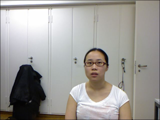

In [257]:
im.to_thumb(160)

In [258]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f))
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [261]:
# Check if pose file exists before getting coordinates
def safe_get_ctr(f):
	pose_file = img2pose(f)
	if not pose_file.exists():
		return None
	try:
		return get_ctr(f)
	except:
		return None

# Test with first image that has a valid pose file
for img in img_files:
	ctr = safe_get_ctr(img)
	if ctr is not None:
		print(f"Found valid coordinates for {img.name}:")
		print(ctr)
		break

In [262]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)]
)

In [265]:
# Filter out images that don't have corresponding pose files and valid coordinates
def filter_valid_files(files):
	valid_files = []
	for f in files:
		if img2pose(f).exists():
			try:
				ctr = get_ctr(f)
				if ctr is not None:
					valid_files.append(f)
			except:
				continue
	return valid_files

# Update get_items to return only valid files
biwi = DataBlock(
	blocks=(ImageBlock, PointBlock),
	get_items=lambda p: filter_valid_files(get_image_files(p)),
	get_y=get_ctr,
	splitter=FuncSplitter(lambda o: o.parent.name=='13'),
	batch_tfms=[*aug_transforms(size=(240,320)), 
				Normalize.from_stats(*imagenet_stats)]
)

# Create dataloaders with error handling
try:
	dls = biwi.dataloaders(path)
	dls.show_batch(max_n=9, figsize=(8,6))
except Exception as e:
	print(f"Error creating dataloaders: {e}")

Error creating dataloaders: 'NoneType' object is not iterable


In [267]:
# First ensure the dataset is properly downloaded
if not (path/'train').exists():
	print("Downloading and extracting BIWI dataset...")
	path = untar_data(URLs.BIWI_HEAD_POSE)

# Create dataloaders with error handling
try:
	# Verify that the training directory exists and contains images
	train_path = path/'train'
	if not train_path.exists() or not list(train_path.glob('*.jpg')):
		print(f"Warning: Training directory {train_path} is empty or doesn't exist")
	
	# Get a batch if dataloaders are available
	if dls is not None:
		xb,yb = dls.one_batch()
		print(f"Batch shapes - xb: {xb.shape}, yb: {yb.shape}")
except Exception as e:
	print(f"Error loading batch: {e}")
	print("Please ensure the BIWI dataset is properly downloaded and extracted.")

Error loading batch: [Errno 2] No such file or directory: '/Users/devanshusaindane/.fastai/data/biwi_head_pose/train/007205.jpg'
Please ensure the BIWI dataset is properly downloaded and extracted.


In [268]:
yb[0]

tensor([1])

In [269]:
learn = vision_learner(dls, resnet18, y_range=(-1,1))
def sigmoid_range(x, lo, hi): return torch.sigmoid(x) * (hi-lo) + lo

In [270]:
dls.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [271]:
learn.lr_find()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/devanshusaindane/.fastai/data/biwi_head_pose/train/008106.jpg'

In [272]:
lr = 2e-2
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,time


FileNotFoundError: [Errno 2] No such file or directory: '/Users/devanshusaindane/.fastai/data/biwi_head_pose/train/000344.jpg'

In [273]:
#IMAGENETTE

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.IMAGENETTE)

In [4]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     get_y=parent_label,
                     item_tfms=Resize(460),
                     batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

In [12]:
import torch

# Explicitly set device to CPU
device = torch.device('cpu')
dls = dblock.dataloaders(path, bs=64, device=device)


In [13]:
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [14]:
x,y = dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

(TensorImage([-0.0645,  0.0242,  0.1202]),
 TensorImage([1.2201, 1.2279, 1.3686]))

In [15]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       get_y=parent_label,
                       item_tfms=Resize(400),
                       batch_tfms=[*aug_transforms(size=size), Normalize.from_stats(*imagenet_stats)])

In [16]:
dls= get_dls(64, 224)
learn = Learner(dls, xresnet50(), loss_func=CrossEntropyLossFlat(), metrics=accuracy)


In [19]:
import torch

# Force CPU usage
device = torch.device('cpu')

# First create the dataloaders with CPU device
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
				  get_items=get_image_files,
				  get_y=parent_label,
				  item_tfms=Resize(400),
				  batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

# Create dataloaders with the path and CPU device
dls = dblock.dataloaders(path, device=device)

# Now create the learner and train
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.to_fp32()  # Use FP32 instead of mixed precision
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [20]:
#Progressive Resizing

In [24]:
from fastai.vision.all import *

def get_dls(batch_size, image_size):
    path = untar_data(URLs.PETS) / "images"
    dblock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(),
        get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
        item_tfms=Resize(image_size),
        batch_tfms=aug_transforms()
    )
    return dblock.dataloaders(path, bs=batch_size)



In [25]:
learn.dls = get_dls(64, 224)
learn.fine_tune(5, 1e-3)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [86]:
preds, targs = learn.tta()

TypeError: 'NoneType' object is not subscriptable

In [87]:
accuracy(preds, targs).item()

NameError: name 'targs' is not defined

In [88]:
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy,
                cbs=MixUp)
learn.fit_one_cycle(5, 3e-3)

AttributeError: 'NoneType' object has no attribute 'train'

In [89]:
model = xresnet50()
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(),
 metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

AttributeError: 'NoneType' object has no attribute 'train'

In [26]:
#Collaborative Filtering

In [27]:
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [28]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                        names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [29]:
last_skywalker = np.array([0.98,0.9,-0.9])

In [30]:
user1 = np.array([0.9,0.8,-0.6])

In [31]:
(user1 * last_skywalker).sum()

np.float64(2.1420000000000003)

In [32]:
casablanca = np.array([-0.99,-0.3,0.8])

In [33]:
(user1 * casablanca).sum()

np.float64(-1.611)

In [34]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1',
                        usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [35]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [36]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,130,Spawn (1997),4
1,466,"Empire Strikes Back, The (1980)",4
2,294,"Ghost and the Darkness, The (1996)",3
3,671,"Usual Suspects, The (1995)",5
4,532,"Ice Storm, The (1997)",3
5,763,On Golden Pond (1981),4
6,320,Bad Boys (1995),3
7,308,Kalifornia (1993),4
8,259,Apocalypse Now (1979),5
9,308,Cold Comfort Farm (1995),4


In [37]:
n_users = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

In [38]:
one_hot_3 = one_hot(3, n_users).float()
user_factors.t() @ one_hot_3

tensor([ 0.8241,  0.9949,  0.1012,  0.1354, -1.4578])

In [39]:
user_factors[3]

tensor([ 0.8241,  0.9949,  0.1012,  0.1354, -1.4578])

In [40]:
class Example:
    def __init__(self, a): self.a = a
    def say(self,x): return f'Hello {self.a}, {x}.'

In [41]:
ex = Example('Sylvain')
ex.say('nice to meet you')

'Hello Sylvain, nice to meet you.'

In [42]:
class DotProduct(Module):
    def __init__(self, n_users, n_moves, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
    
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)

In [43]:
x, y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [44]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [45]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.346061,1.324762,00:05
1,1.036577,1.119136,00:05
2,0.877925,0.996762,00:05
3,0.773411,0.910378,00:06
4,0.757401,0.887404,00:05


In [46]:
from fastai.vision.all import *

class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)


epoch,train_loss,valid_loss,time
0,0.927755,0.982125,00:05
1,0.671460,0.940047,00:05
2,0.453951,0.941666,00:05
3,0.378977,0.947733,00:06
4,0.337235,0.944683,00:05


In [47]:
class DotProductBias(Module):
	def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
		self.user_factors = Embedding(n_users, n_factors)
		self.user_bias = Embedding(n_users, 1)
		self.movie_factors = Embedding(n_movies, n_factors)
		self.movie_bias = Embedding(n_movies, 1)
		self.y_range = y_range
		
	def forward(self, x):
		users = self.user_factors(x[:,0])
		movies = self.movie_factors(x[:,1])
		res = (users * movies).sum(dim=1, keepdim=True)
		res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
		return sigmoid_range(res, *self.y_range)

In [48]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.884813,0.952868,00:07
1,0.600600,0.920719,00:07
2,0.412659,0.947482,00:07
3,0.333881,0.958579,00:06
4,0.305060,0.959173,00:06


In [49]:
#Weight Decay

In [50]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.925679,0.943801,00:07
1,0.680797,0.902263,00:06
2,0.534749,0.878048,00:06
3,0.456841,0.859630,00:06
4,0.442685,0.853479,00:07


In [51]:
class T(Module):
    def __init__(self):
        self.a = torch.ones(3)
L(T().parameters())

(#0) []

In [52]:
class T(Module):
 def __init__(self): self.a = nn.Parameter(torch.ones(3))
L(T().parameters())


(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

In [53]:
class T(Module):
 def __init__(self): self.a = nn.Linear(1, 3, bias=False)

In [54]:
t = T()
L(t.parameters())

(#1) [Parameter containing:
tensor([[-0.2151],
        [-0.9422],
        [-0.2691]], requires_grad=True)]

In [55]:
type(t.a.weight)

torch.nn.parameter.Parameter

In [56]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [57]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
    
    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users * movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)

In [58]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.874593,0.939393,00:07
1,0.680249,0.881961,00:06
2,0.507511,0.860760,00:06
3,0.441940,0.849241,00:06
4,0.425505,0.845182,00:06


In [59]:
movies_bias = learn.model.movie_bias.squeeze()
idxs = movies_bias.argsort()[:5]
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Jury Duty (1995)',
 'Robocop 3 (1993)',
 'Booty Call (1997)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)']

In [60]:
learn =collab_learner(dls, n_factors=50, y_range=(0,5.5))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.883478,0.955108,00:07
1,0.675919,0.889302,00:06
2,0.523578,0.874585,00:06
3,0.449952,0.858630,00:06
4,0.435791,0.853921,00:06


In [61]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [62]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]

In [63]:
[dls.classes['title'][i] for i in idxs]

['Titanic (1997)',
 'Star Wars (1977)',
 "Schindler's List (1993)",
 'L.A. Confidential (1997)',
 'Apt Pupil (1998)']

In [64]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Casablanca (1942)'

In [65]:
embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [66]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range
    
    def forward(self, x):
        embs = self.user_factors(x[:,0]), self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

In [67]:
model = CollabNN(*embs)

In [68]:
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.914309,0.947703,00:09
1,0.846292,0.918019,00:08
2,0.814529,0.899675,00:08
3,0.798910,0.879598,00:07
4,0.746898,0.875124,00:07


In [70]:
learn = collab_learner(dls, use_nn=True, y_range=(0,5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.980838,0.979816,00:11
1,0.871064,0.913795,00:10
2,0.809087,0.909800,00:10
3,0.772022,0.876339,00:10
4,0.720359,0.871821,00:10


In [71]:
@delegates(TabularModel)
class EmbeddingNN(TabularModel):
    def __init__(self, emb_szs, layers, **kwargs):
        super().__init__(emb_szs, layers=layers, n_cont=0, out_sz=1, **kwargs)

In [139]:
#Tabular Modeling 

In [1]:
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=4586b6a183780d65162ceeda9ded00cd3efdaffb7741eb2df67019f6bc109315
  Stored in directory: /Users/devanshusaindane/Library/Caches/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [3]:
creds = '{"username":"devanshusaindane","key":"142e77ce763670b3397a2a5f8ddf765b"}'

In [5]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [10]:
from fastai.data.external import untar_data
from fastai.tabular.all import *
path = URLs.path('bluebook')

In [11]:
path

Path('/Users/devanshusaindane/.fastai/archive/bluebook')

In [19]:
#NLP RNNs

In [20]:
from fastai.text.all import *
path = untar_data(URLs.IMDB)

In [21]:
files = get_text_files(path, folders = ['train', 'test', 'unsup'])

In [22]:
txt = files[0].open().read(); txt[:75]

'Alan Rickman & Emma Thompson give good performances with southern/New Orlea'

In [23]:
spacy = WordTokenizer()
toks = first(spacy([txt]))
print(coll_repr(toks, 30))

(#121) ['Alan','Rickman','&','Emma','Thompson','give','good','performances','with','southern','/','New','Orleans','accents','in','this','detective','flick','.','It',"'s",'worth','seeing','for','their','scenes-','and','Rickman',"'s",'scene'...]


In [24]:
first(spacy(['The U.S. dollar $1 is $1.00.']))

(#9) ['The','U.S.','dollar','$','1','is','$','1.00','.']

In [25]:
tkn = Tokenizer(spacy)
print(coll_repr(tkn(txt), 31))

(#139) ['xxbos','xxmaj','alan','xxmaj','rickman','&','xxmaj','emma','xxmaj','thompson','give','good','performances','with','southern','/','xxmaj','new','xxmaj','orleans','accents','in','this','detective','flick','.','xxmaj','it',"'s",'worth','seeing'...]


In [26]:
defaults.text_proc_rules

[<function fastai.text.core.fix_html(x)>,
 <function fastai.text.core.replace_rep(t)>,
 <function fastai.text.core.replace_wrep(t)>,
 <function fastai.text.core.spec_add_spaces(t)>,
 <function fastai.text.core.rm_useless_spaces(t)>,
 <function fastai.text.core.replace_all_caps(t)>,
 <function fastai.text.core.replace_maj(t)>,
 <function fastai.text.core.lowercase(t, add_bos=True, add_eos=False)>]

In [1]:
def subword(sz):
    sp = SubwordTokenizer(vocab_sz=sz)
    sp.setup(files)
    return ' '.join(first(sp([txt]))[:40])

In [1]:
#Deep Learning

In [2]:
#Language Model from Scratch

In [2]:
from fastai.text.all import *
path = untar_data(URLs.HUMAN_NUMBERS)
path.ls()

(#2) [Path('/Users/devanshusaindane/.fastai/data/human_numbers/train.txt'),Path('/Users/devanshusaindane/.fastai/data/human_numbers/valid.txt')]

In [3]:
lines = L()
with open(path/'train.txt') as f: lines += L(*f.readlines())
with open(path/'valid.txt') as f: lines += L(*f.readlines())
lines

(#9998) ['one \n','two \n','three \n','four \n','five \n','six \n','seven \n','eight \n','nine \n','ten \n','eleven \n','twelve \n','thirteen \n','fourteen \n','fifteen \n','sixteen \n','seventeen \n','eighteen \n','nineteen \n','twenty \n'...]

In [4]:
text = ' . '.join([l.strip() for l in lines])
text[:100]

'one . two . three . four . five . six . seven . eight . nine . ten . eleven . twelve . thirteen . fo'

In [5]:
tokens = text.split(' ')
tokens[:10]

['one', '.', 'two', '.', 'three', '.', 'four', '.', 'five', '.']

In [6]:
vocab = L(*tokens).unique()
vocab

(#30) ['one','.','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen','sixteen','seventeen','eighteen','nineteen'...]

In [7]:
word2idx = {w:i for i,w in enumerate(vocab)}
nums = L(word2idx[i] for i in tokens)
nums

(#63095) [0,1,2,1,3,1,4,1,5,1,6,1,7,1,8,1,9,1,10,1...]

In [8]:
L((tokens[i:i+3], tokens[i+3]) for i in range(0, len(tokens)-4, 3))

(#21031) [(['one', '.', 'two'], '.'),(['.', 'three', '.'], 'four'),(['four', '.', 'five'], '.'),(['.', 'six', '.'], 'seven'),(['seven', '.', 'eight'], '.'),(['.', 'nine', '.'], 'ten'),(['ten', '.', 'eleven'], '.'),(['.', 'twelve', '.'], 'thirteen'),(['thirteen', '.', 'fourteen'], '.'),(['.', 'fifteen', '.'], 'sixteen'),(['sixteen', '.', 'seventeen'], '.'),(['.', 'eighteen', '.'], 'nineteen'),(['nineteen', '.', 'twenty'], '.'),(['.', 'twenty', 'one'], '.'),(['.', 'twenty', 'two'], '.'),(['.', 'twenty', 'three'], '.'),(['.', 'twenty', 'four'], '.'),(['.', 'twenty', 'five'], '.'),(['.', 'twenty', 'six'], '.'),(['.', 'twenty', 'seven'], '.')...]

In [9]:
seqs = L((tensor(nums[i:i+3]), nums[i+3]) for i in range(0, len(nums)-4, 3))

In [10]:
seqs

(#21031) [(tensor([0, 1, 2]), 1),(tensor([1, 3, 1]), 4),(tensor([4, 1, 5]), 1),(tensor([1, 6, 1]), 7),(tensor([7, 1, 8]), 1),(tensor([1, 9, 1]), 10),(tensor([10,  1, 11]), 1),(tensor([ 1, 12,  1]), 13),(tensor([13,  1, 14]), 1),(tensor([ 1, 15,  1]), 16),(tensor([16,  1, 17]), 1),(tensor([ 1, 18,  1]), 19),(tensor([19,  1, 20]), 1),(tensor([ 1, 20,  0]), 1),(tensor([ 1, 20,  2]), 1),(tensor([ 1, 20,  3]), 1),(tensor([ 1, 20,  4]), 1),(tensor([ 1, 20,  5]), 1),(tensor([ 1, 20,  6]), 1),(tensor([ 1, 20,  7]), 1)...]

In [11]:
bs = 64
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(seqs[:cut], seqs[cut:], bs=bs, shuffle=False)

In [12]:
class LMModel1(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.h_h = nn.Linear(n_hidden, n_hidden)
        self.h_o = nn.Linear(n_hidden, vocab_sz)

    def forward(self, x):
        h = F.relu(self.h_h(self.i_h(x[:,0])))
        h += self.i_h(x[:,1])
        h = F.relu(self.h_h(h))
        h = h + self.i_h(x[:,2])
        h = F.relu(self.h_h(h))
        return self.h_o(h)
    

In [17]:
#RNN 

In [18]:
class LMModel2(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.h_h = nn.Linear(n_hidden, n_hidden)
        self.h_o = nn.Linear(n_hidden, vocab_sz)

    def forward(self, x):
        h = 0
        for i in range(3):
            h = h + self.i_h(x[:,i])
            h = F.relu(self.h_h(h))
        return self.h_o(h)

In [19]:
learn = Learner(dls, LMModel2(len(vocab), 64), loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.758993,2.014805,0.405277,00:01
1,1.405174,1.777761,0.467079,00:01
2,1.422723,1.679874,0.492750,00:01
3,1.390302,1.663675,0.432612,00:01


In [20]:
class LMModel3(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.h_h = nn.Linear(n_hidden, n_hidden)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h = 0

    def forward(self, x):
        for i in range(3):
            self.h = self.h + self.i_h(x[:,i])
            self.h = F.relu(self.h_h(self.h))
        out = self.h_o(self.h)
        self.h = self.h.detach()
        return out
    def reset(self): self.h = 0